# Supervised Learning with scikit-learn
## Classification

### Import Statements

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Read the Dataset

In [2]:
df = pd.read_csv("./datasets/us_congress_voting.csv")

### Change Column Names

In [3]:
cols = ['party', 'infants', 'water', 'budget', 'physician', 'salvador',
       'religious', 'satellite', 'aid', 'missile', 'immigration', 'synfuels',
       'education', 'superfund', 'crime', 'duty_free_exports', 'eaa_rsa']
df.columns = cols

### Replacing Boolean Values

In [4]:
df.replace(to_replace=["n", "?", "y"], value=[0, 0, 1], inplace=True)

### Save Preprocessed Dataset

In [5]:
df.to_csv("./datasets/us_congress_voting.csv", index=False)

### k-Nearest Neighbors: Fit
- Import KNeighborsClassifier from sklearn.neighbors.
- Create arrays X and y for the features and the target variable. Here this has been done for you. Note the use of .drop() to drop the target variable 'party' from the feature array X as well as the use of the .values attribute to ensure X and y are NumPy arrays. Without using .values, X and y are a DataFrame and Series respectively; the scikit-learn API will accept them in this form also as long as they are of the right shape.
- Instantiate a KNeighborsClassifier called knn with 6 neighbors by specifying the n_neighbors parameter.
- Fit the classifier to the data using the .fit() method.

In [6]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier

# Create arrays for the features and the response variable
y = df['party'].values
X = df.drop('party', axis=1).values

# Create a k-NN classifier with 6 neighbors
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

KNeighborsClassifier(n_neighbors=6)

### k-Nearest Neighbors: Predict
- Create arrays for the features and the target variable from df. As a reminder, the target variable is 'party'.
- Instantiate a KNeighborsClassifier with 6 neighbors.
- Fit the classifier to the data.
- Predict the labels of the training data, X.
- Predict the label of the new data point X_new.

In [7]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

X_new = [[0.69646919, 0.28613933, 0.22685145, 0.55131477, 0.71946897, 0.42310646,
  0.9807642,  0.68482974, 0.4809319,  0.39211752, 0.34317802, 0.72904971,
  0.43857224, 0.0596779,  0.39804426, 0.73799541]]

# Create arrays for the features and the response variable
y = df["party"].values
X = df.drop("party", axis=1).values

# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the data
knn.fit(X, y)

# Predict the labels for the training data X
y_pred = knn.predict(X)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

Prediction: ['democrat']


### The digits recognition dataset
- Import datasets from sklearn and matplotlib.pyplot as plt.
- Load the digits dataset using the .load_digits() method on datasets.
- Print the keys and DESCR of digits.
- Print the shape of images and data keys using the . notation.
- Display the 1011th image using plt.imshow(). This has been done for you, so hit 'Submit Answer' to see which handwritten digit this happens to be!

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are di

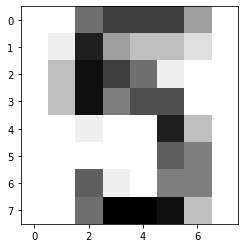

In [8]:
# Import necessary modules
from sklearn import datasets
import matplotlib.pyplot as plt

# Load the digits dataset: digits
digits = datasets.load_digits()

# Print the keys and DESCR of the dataset
print(digits.keys())
print(digits["DESCR"])

# Print the shape of the images and data keys
print(digits["images"].shape)
print(digits["data"].shape)

# Display digit 1010
plt.imshow(digits.images[1010], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

### Train/Test Split + Fit/Predict/Accuracy
- Import KNeighborsClassifier from sklearn.neighbors and train_test_split from sklearn.model_selection.
- Create an array for the features using digits.data and an array for the target using digits.target.
- Create stratified training and test sets using 0.2 for the size of the test set. Use a random state of 42. Stratify the split according to the labels so that they are distributed in the training and test sets as they are in the original dataset.
- Create a k-NN classifier with 7 neighbors and fit it to the training data.
- Compute and print the accuracy of the classifier's predictions using the .score() method.

In [9]:
# Import necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

# Create feature and target arrays
X = digits["data"]
y = digits["target"]

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.9833333333333333


### Overfitting and underfitting
- Inside the for loop:
    - Setup a k-NN classifier with the number of neighbors equal to k.
    - Fit the classifier with k neighbors to the training data.
    - Compute accuracy scores the training set and test set separately using the .score() method and assign the results to the train_accuracy and test_accuracy arrays respectively.